In [1]:
path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/'

In [2]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile
import os

## Target analysis - draft

In [3]:
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

<ipython-input-3-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0
<ipython-input-3-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0
<ipython-input-3-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0


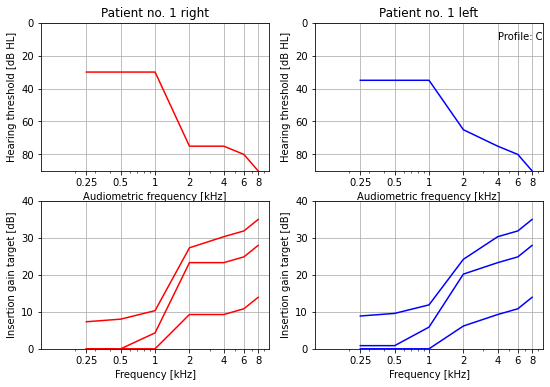

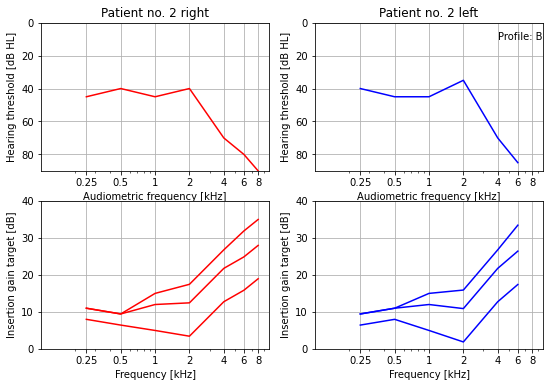

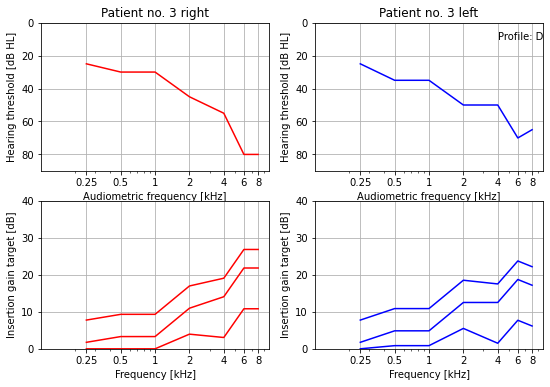

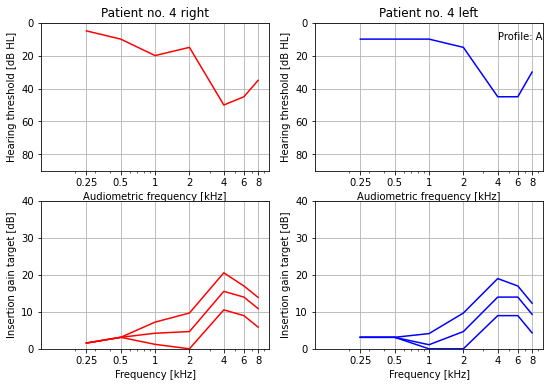

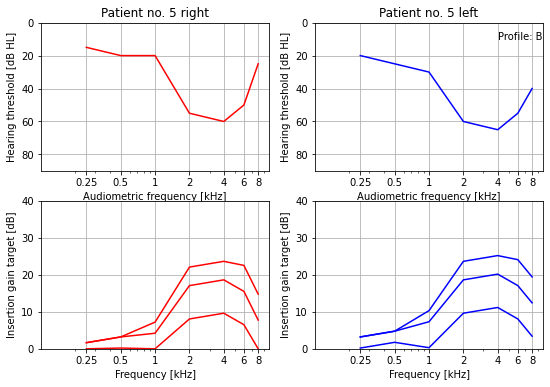

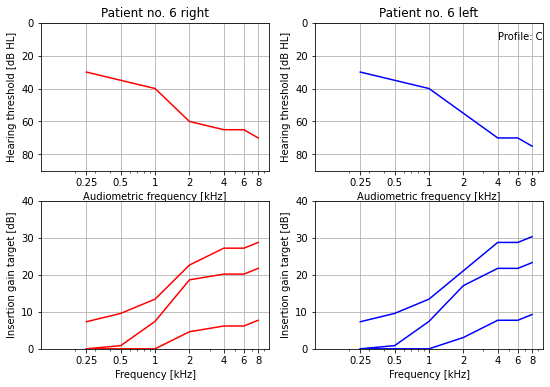

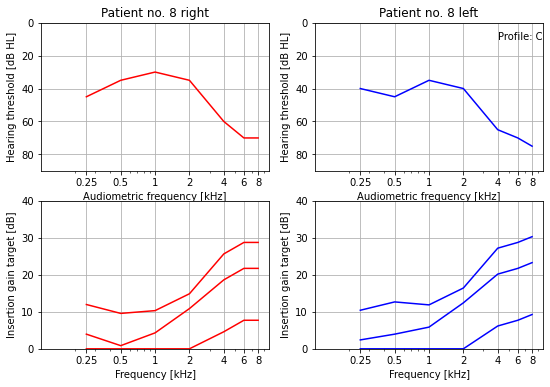

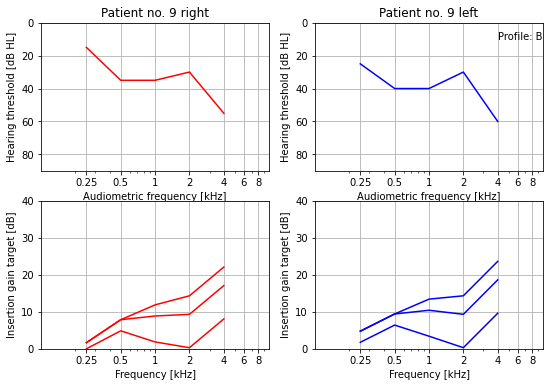

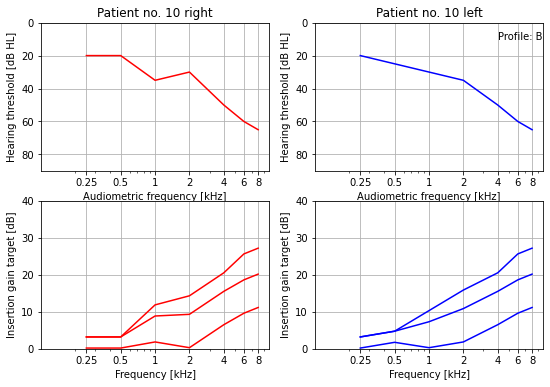

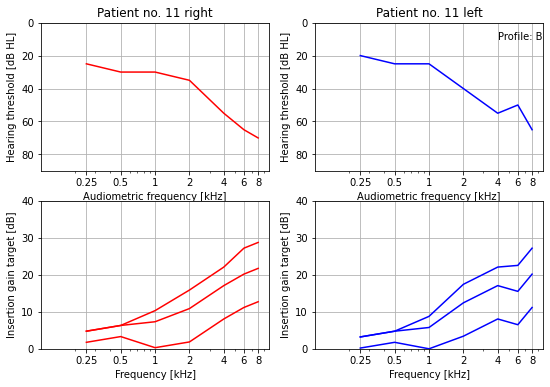

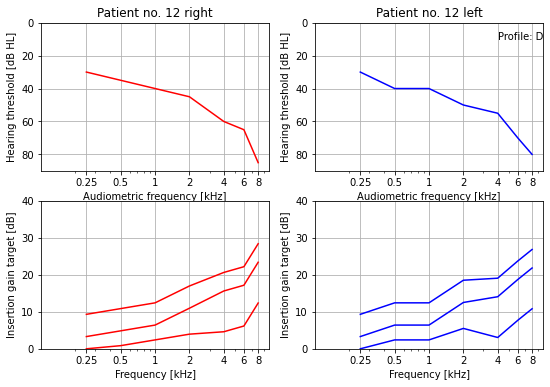

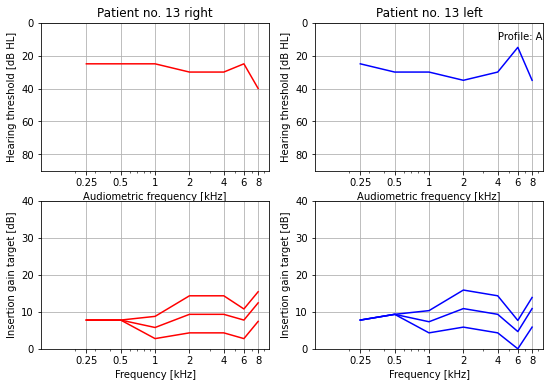

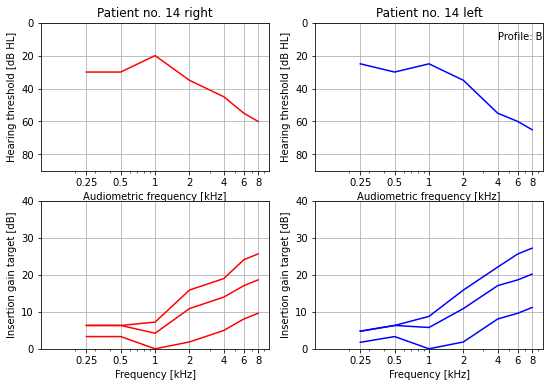

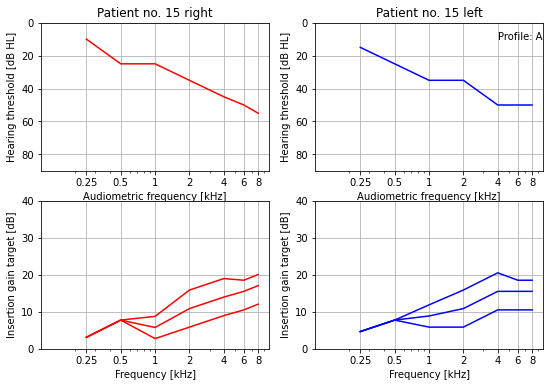

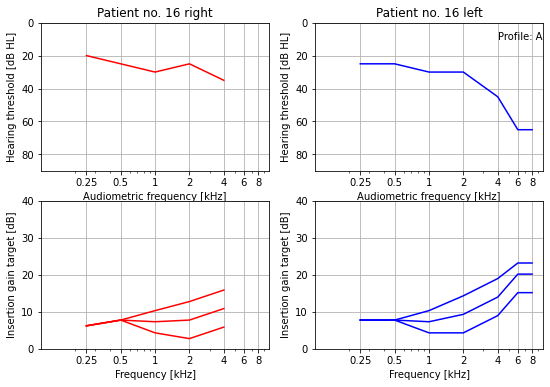

In [4]:
df = pd.read_excel(path+'WP4 Pilots Data OUH_Widex.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)
    
    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs_audio_no3k,target_right[0,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[1,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[2,:],'r')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs_audio_no3k,target_left[0,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[1,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[2,:],'b')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')


## Now try to smooth the REM data 

In [5]:
# Load all the REM data files from sharepoint

#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    cnt += 1
df_REM = pd.concat(REM_)



#smoothing 
np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')

C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-128 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-132 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-22 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-26 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-28 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-34 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-36 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-40 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-64 first fit.txt
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-66 first fit.txt
C:/Users

In [6]:
#now load the smoothed data again (you need to run Smoothing_REM_input.m in Matlab in order to create the file)
df_REM.reset_index(inplace=True)
REM_smooth = pd.concat((df_REM.iloc[:,0:4], pd.read_csv(path + 'Smoothed_REM_WP4.csv', names= df_REM.loc[:,'86':'9976'].columns)),axis=1).iloc[:,1:]

In [7]:
REM_smooth

,RC_ID,Test,Ear,86,129,172,215,258,301,344,...,9589,9632,9675,9718,9761,9804,9847,9890,9933,9976
0,WP4-364-128 first fit,REUG 70,Left,1.866000,1.28910,0.076244,-0.195750,-0.600240,-0.599020,-0.323030,...,0.49057,0.2530,0.005682,-0.26961,-0.54598,-0.54598,-0.76455,-0.94552,-1.1394,-1.3465
1,WP4-364-128 first fit,REUG 70,Right,1.047900,0.66008,0.008357,-0.173570,-0.417550,-0.292640,-0.188990,...,7.29660,7.2560,7.214700,7.16810,7.10730,7.10730,7.04850,6.98620,6.9232,6.8618
2,WP4-364-128 first fit,REOG 70,Left,1.957200,1.43310,0.265840,-0.015694,-0.458030,-0.501300,-0.274510,...,-1.96920,-2.2138,-2.488100,-2.76710,-3.05660,-3.05660,-3.33060,-3.57140,-3.7966,-4.0231
3,WP4-364-128 first fit,REOG 70,Right,1.050400,0.66630,0.018190,-0.155780,-0.374820,-0.249980,-0.189490,...,4.84190,4.8146,4.775900,4.72690,4.66120,4.66120,4.58420,4.49680,4.4068,4.3090
4,WP4-364-128 first fit,REIG 65,Left,0.098765,0.10965,0.058933,0.042806,0.023435,-0.005674,-0.007234,...,14.13800,14.2020,14.293000,14.40300,14.52000,14.52000,14.60500,14.63500,14.6630,14.6940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,WP4-365-0026 first fit,REIG 55,Left,-3.494500,-2.05370,0.650780,0.793260,1.256900,1.493800,1.308000,...,11.74200,11.7750,11.843000,11.94000,12.05300,12.05300,12.16400,12.24600,12.2930,12.3130
566,WP4-365-0026 first fit,REIG 80,Right,-1.220700,-0.53170,1.146400,1.282400,1.604900,1.864200,2.086200,...,10.58600,10.6380,10.712000,10.82200,10.91800,10.91800,10.94600,10.91500,10.8120,10.6840
567,WP4-365-0026 first fit,REIG 80,Left,0.042725,0.41298,1.124600,1.207200,1.484100,1.605100,1.557200,...,-3.05630,-3.0904,-3.109700,-3.11140,-3.09820,-3.09820,-3.06270,-3.00520,-2.9394,-2.8770
568,WP4-365-0026 first fit,LTASS 65,Right,-0.701210,-0.16528,1.091100,1.069200,1.101500,1.406100,1.767800,...,4.76940,4.8717,4.974400,5.05970,5.13320,5.13320,5.19580,5.22210,5.2071,5.1560


## Try to plot both smoothed insertion gain and targets

<ipython-input-3-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0
<ipython-input-3-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0


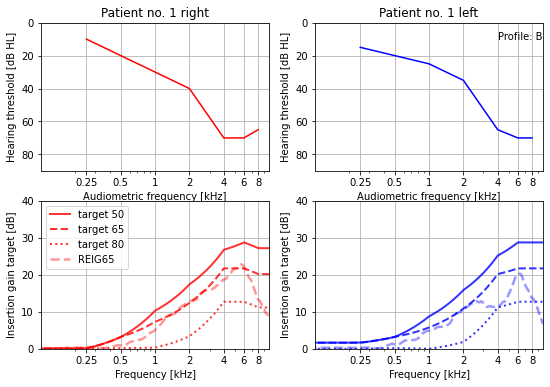

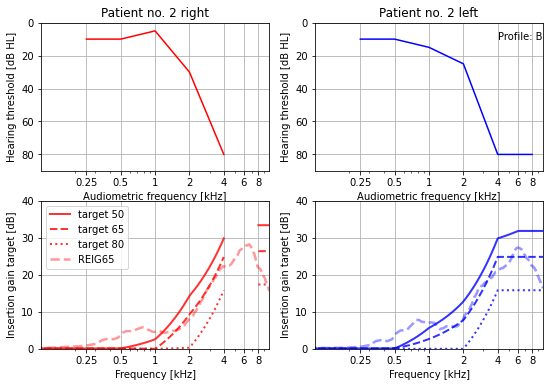

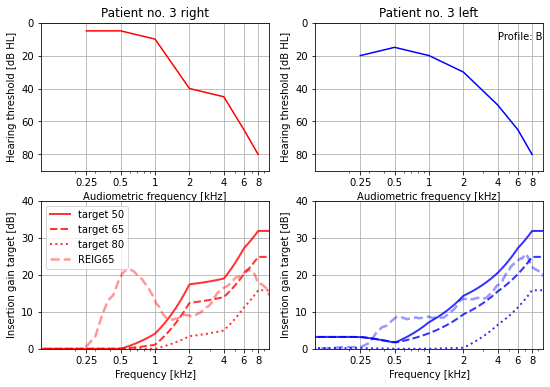

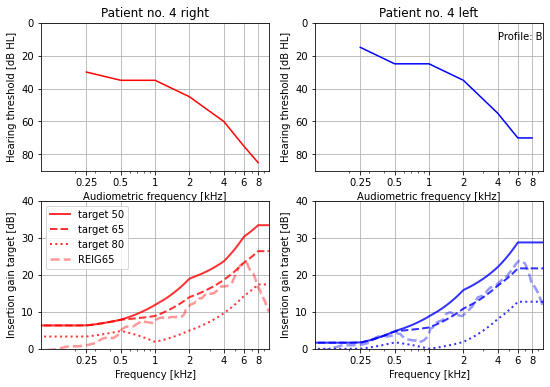

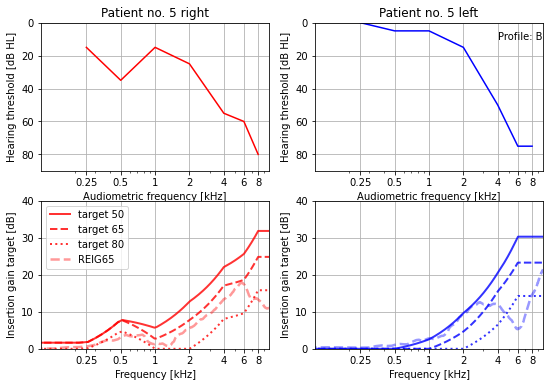

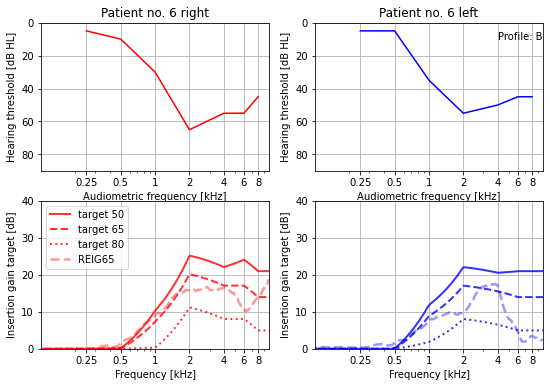

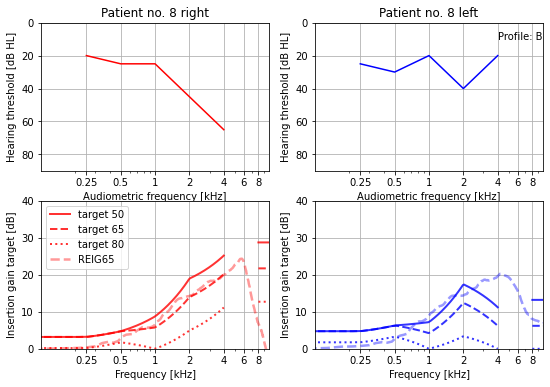

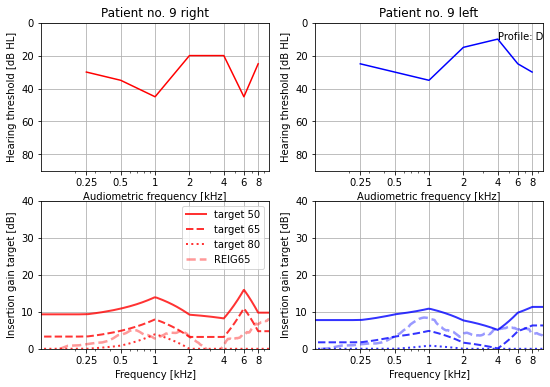

In [8]:

df = pd.read_excel(path+'WP4 Pilots Data AUH_Widex.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)


    #now get the corresponding REM     
    df_ = REM_smooth[REM_smooth['RC_ID'].str.contains(df.iloc[patient_idx,0][4:])]

    if(df_.empty):
        continue

    freqs_s = list(df_.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    
    # Find all REIG 65 for a given patient
    all_id_right = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Right').values )
    all_id_left  = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Left').values )
    
    # Choose the max (or other value) of all the id_right and left
    id_right = np.max(all_id_right)
    id_left  = np.max(all_id_left)


    #interpolate the frequencies and values of the audiogram 
    target_left_ = []
    target_right_ = []
    for idx in range(3):
        target_left_.append(np.interp(freqs, freqs_audio_no3k, target_left[idx,:].astype('float64')))
        target_right_.append(np.interp(freqs, freqs_audio_no3k, target_right[idx,:].astype('float64')))

    target_left__ = np.array(target_left_)
    target_right__ = np.array(target_right_)
    

    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs,target_right__[0,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'solid',label='target 50')
    plt.semilogx(freqs,target_right__[1,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dashed',label='target 65')
    plt.semilogx(freqs,target_right__[2,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dotted',label='target 80')
    #REM 2 REIG65dB
    plt.semilogx(freqs,df_.iloc[id_right,3:],'r',linewidth=2.5,alpha=0.4,linestyle='dashed',label='REIG65')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    plt.legend()
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs,target_left__[0,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'solid')
    plt.semilogx(freqs,target_left__[1,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dashed')
    plt.semilogx(freqs,target_left__[2,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dotted')
    #REM @ REIG65dB
    plt.semilogx(freqs,df_.iloc[id_left,3:],'b',linewidth=2.5,alpha=0.4,linestyle='dashed')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')

## Plot the above, but for each patient one by one

WP4-364-76 first fit


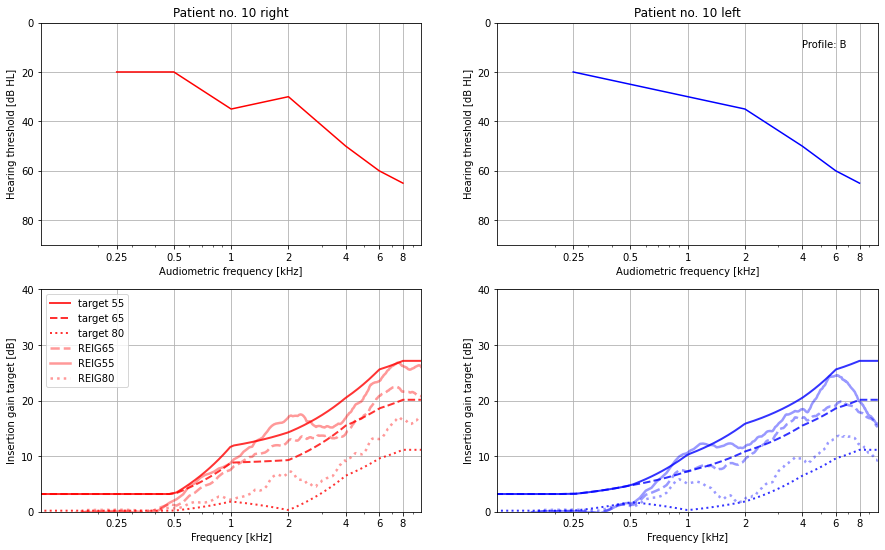

In [10]:
df = pd.read_excel(path+'WP4 Pilots Data OUH_Widex.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]

patient_idx = 1          # patient ordinal number, from 0 to N-1
shift_rem_idx = -0       # -0 = last measurement, -1 = second last, -2 = third last etc.

audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
profile = df.iloc[patient_idx, 24]
    
if profile == 'O':
    print("Profile O detected!")
    
target_left = calculateBEARtarget(np.array(audio_left), profile)
target_right = calculateBEARtarget(np.array(audio_right), profile)


#now get the corresponding REM     
df_ = REM_smooth[REM_smooth['RC_ID'].str.contains(df.iloc[patient_idx,0][4:])]

if(df_.empty):
    print("df_ empty!")

freqs_s = list(df_.columns)
freqs_s = freqs_s[3:]
freqs = [float(s) for s in freqs_s]

    
# Find all REIG 55, 65 and 75 for a given patient
all_id_right65, _ = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Right').values )
all_id_left65, _  = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Left').values )

all_id_right55, _ = np.where( (df_[['Test']] == 'REIG 55').values * (df_[['Ear']] == 'Right').values )
all_id_left55, _  = np.where( (df_[['Test']] == 'REIG 55').values * (df_[['Ear']] == 'Left').values )

all_id_right80, _ = np.where( (df_[['Test']] == 'REIG 80').values * (df_[['Ear']] == 'Right').values )
all_id_left80, _  = np.where( (df_[['Test']] == 'REIG 80').values * (df_[['Ear']] == 'Left').values )

    
# Choose the last (or other value) of all the id_right and left
if len(all_id_right65) >= (1-shift_rem_idx):
    rem_idx = -1+shift_rem_idx
else:
    rem_idx = -1
    print(f"Just {len(all_id_right65)} REM measurement at 65 dB found! Showing the last one...")
    
id_right65 = all_id_right65[rem_idx]
id_left65  = all_id_left65[rem_idx]


if len(all_id_right55) >= (1-shift_rem_idx):
    rem_idx = -1+shift_rem_idx
else:
    rem_idx = -1
    print(f"Just {len(all_id_right55)} REM measurement at 55 dB found! Showing the last one...")

id_right55 = all_id_right55[rem_idx]
id_left55  = all_id_left55[rem_idx]


if len(all_id_right80) >= (1-shift_rem_idx):
    rem_idx = -1+shift_rem_idx
else:
    rem_idx = -1
    print(f"Just {len(all_id_right80)} REM measurement at 80 dB found! Showing the last one...")

id_right80 = all_id_right80[rem_idx]
id_left80  = all_id_left80[rem_idx]

#interpolate the frequencies and values of the audiogram 
target_left_ = []
target_right_ = []
for idx in range(3):
    target_left_.append(np.interp(freqs, freqs_audio_no3k, target_left[idx,:].astype('float64')))
    target_right_.append(np.interp(freqs, freqs_audio_no3k, target_right[idx,:].astype('float64')))

target_left__ = np.array(target_left_)
target_right__ = np.array(target_right_)
    

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.semilogx(freqs_audio_no3k,-audio_right,'r')
plt.grid()
plt.title(f"Patient no. {patient_idx+1} right")
plt.ylim(-90, 0)
plt.xlim(100, 10000)
plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
plt.xlabel('Audiometric frequency [kHz]')
plt.ylabel('Hearing threshold [dB HL]')
    
plt.subplot(2,2,2)
plt.semilogx(freqs_audio_no3k,-audio_left,'b')
plt.grid()
plt.title(f"Patient no. {patient_idx+1} left")
plt.text(4000, -10, "Profile: "+profile)
plt.ylim(-90, 0)
plt.xlim(100, 10000)
plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
plt.xlabel('Audiometric frequency [kHz]')
plt.ylabel('Hearing threshold [dB HL]')    
    
    
plt.subplot(2,2,3)
# Target
plt.semilogx(freqs,target_right__[0,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'solid',label='target 55')
plt.semilogx(freqs,target_right__[1,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dashed',label='target 65')
plt.semilogx(freqs,target_right__[2,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dotted',label='target 80')
# REM 
plt.semilogx(freqs,df_.iloc[id_right55,3:],'r',linewidth=2.5,alpha=0.4,linestyle='solid',label='REIG55')
plt.semilogx(freqs,df_.iloc[id_right65,3:],'r',linewidth=2.5,alpha=0.4,linestyle='dashed',label='REIG65')
plt.semilogx(freqs,df_.iloc[id_right80,3:],'r',linewidth=2.5,alpha=0.4,linestyle='dotted',label='REIG80')

plt.grid()
#plt.title(f"Patient no. {patient_idx+1} right")
plt.ylim(0, 40)
plt.xlim(100, 10000)
plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
plt.xlabel('Frequency [kHz]')
plt.ylabel('Insertion gain target [dB]')
plt.legend()
    
plt.subplot(2,2,4)
# Target
plt.semilogx(freqs,target_left__[0,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'solid')
plt.semilogx(freqs,target_left__[1,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dashed')
plt.semilogx(freqs,target_left__[2,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dotted')
# REM
plt.semilogx(freqs,df_.iloc[id_left55,3:],'b',linewidth=2.5,alpha=0.4,linestyle='solid')
plt.semilogx(freqs,df_.iloc[id_left65,3:],'b',linewidth=2.5,alpha=0.4,linestyle='dashed')
plt.semilogx(freqs,df_.iloc[id_left80,3:],'b',linewidth=2.5,alpha=0.4,linestyle='dotted')
plt.grid()
#plt.title(f"Patient no. {patient_idx+1} left")
plt.ylim(0, 40)
plt.xlim(100, 10000)
plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
plt.xlabel('Frequency [kHz]')
plt.ylabel('Insertion gain target [dB]')


print(df_.iloc[0,0])

In [ ]:
print(df.iloc[patient_idx,0])